GBM LCs repository: /astrodata/romain/GBM_LC_repository/data/bn*********/LC/

In [4]:
################################################################################
# Import the libraries
################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GBM GRBs fluence catalogue: see Table 6 of von Kienlin et al. (2020) 

In [2]:
################################################################################
# Load the machine readable Table 6 of von Kienlin et al. (2020)
################################################################################

fermi_ids = []
fluences = []
e_fluences = []

with open('./von_kienlin20_apj_table6.txt', 'r') as f:
    lines = f.readlines()[22:]
    for line in lines[:-1]:
        words = line.split()
        fermi_ids.append(words[0])
        fluences.append(float(words[1]))
        e_fluences.append(float(words[2]))
        
fluence_dict = {'fermi_ids': fermi_ids, 'fluences': fluences, 'e_fluences': e_fluences}

fluence_df = pd.DataFrame(fluence_dict)
fluence_df

,fermi_ids,fluences,e_fluences
0,bn080714086,6.760000e-07,4.070000e-08
1,bn080714425,1.810000e-06,2.090000e-08
2,bn080714745,6.330000e-06,1.410000e-07
3,bn080715950,5.040000e-06,7.950000e-08
4,bn080717543,4.460000e-06,7.680000e-08
...,...,...,...
2354,bn180703876,1.630000e-05,4.290000e-08
2355,bn180703949,8.850000e-06,1.820000e-08
2356,bn180706351,3.980000e-06,2.950000e-08
2357,bn180709099,3.880000e-06,2.750000e-08


In [3]:
################################################################################
# Select only those GRBs whose fluence is at least equal to 1e-5
################################################################################

bright_fluence_df = fluence_df[fluence_df['fluences'] >= 1e-5]
bright_fluence_df

,fermi_ids,fluences,e_fluences
7,bn080723557,0.000072,2.540000e-07
9,bn080723985,0.000031,2.070000e-07
10,bn080724401,0.000016,5.040000e-08
13,bn080727964,0.000013,7.910000e-08
23,bn080806896,0.000013,1.940000e-07
...,...,...,...
2338,bn180612785,0.000016,5.770000e-08
2340,bn180615462,0.000015,1.780000e-07
2343,bn180618724,0.000019,5.270000e-08
2348,bn180623849,0.000020,3.400000e-08


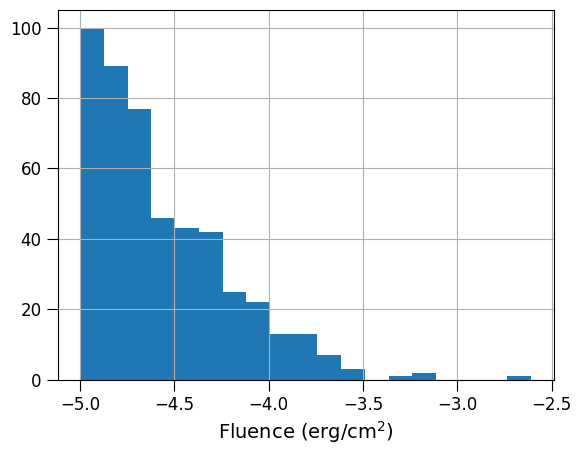

In [25]:
bright_fluences = bright_fluence_df['fluences']

################################################################################
# Plot the histogram of the fluences
################################################################################

fig, ax = plt.subplots(1, 1)
log_fluences = np.log10(bright_fluences)
log_bins = np.linspace(np.min(log_fluences), np.max(log_fluences), 20)
ax.hist(log_fluences, bins=log_bins)
ax.xaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.yaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.set_xlabel(r'Fluence (erg/cm$^2$)', size=14)
ax.grid(which='both')
plt.show()

In [26]:
################################################################################
# Save the list of selected Fermi IDs
################################################################################

np.savetxt('./bright_gbm_grbs.txt', bright_fluence_df['fermi_ids'], fmt='%s')